# Project 2
## This project will be an extension of my project 1. This project will talk about how many times each team in the Premier League has won against big teams and much more.
The main goal of this project is to analyze English Premier League teams' performances, paying particular attention to their winning records. Through the analysis of past match data, our goal is to pinpoint the teams that have won the most number of games, showcasing the most prosperous clubs in the league's history. In addition, we calculate the win percentages in order to provide a clear picture of consistent performance over time. In addition to identifying the top players, this analysis sheds light on the dynamics of success in one of the world's most competitive football leagues. I will be providing in-depth data visualizations, such as bar graphs and scatter plots, giving fans for this topic a better idea of where brilliance lies in English football.

# Data wrangling, munging and cleaning

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('PremierLeague.csv').fillna(0)
print(df.columns)

Index(['Season', 'Date', 'Time', 'HomeTeam', 'AwayTeam',
       'FullTimeHomeTeamGoals', 'FullTimeAwayTeamGoals', 'FullTimeResult',
       'HalfTimeHomeTeamGoals', 'HalfTimeAwayTeamGoals', 'HalfTimeResult',
       'Referee', 'HomeTeamShots', 'AwayTeamShots', 'HomeTeamShotsOnTarget',
       'AwayTeamShotsOnTarget', 'HomeTeamCorners', 'AwayTeamCorners',
       'HomeTeamFouls', 'AwayTeamFouls', 'HomeTeamYellowCards',
       'AwayTeamYellowCards', 'HomeTeamRedCards', 'AwayTeamReadCards',
       'B365HomeTeam', 'B365Draw', 'B365AwayTeam', 'B365Over2.5Goals',
       'B365Under2.5Goals', 'MarketMaxHomeTeam', 'MarketMaxDraw',
       'MarketMaxAwayTeam', 'MarketAvgHomeTeam', 'MarketAvgDraw',
       'MarketAvgAwayTeam', 'MarketMaxOver2.5Goals', 'MarketMaxUnder2.5Goals',
       'MarketAvgOver2.5Goals', 'MarketAvgUnder2.5Goals'],
      dtype='object')


## Deciding on what a Big Team is
To decide what the biggest teams are we will visualize the data by seeing which teams have won the most games in the history of the Premier League. The top 8 teams will be considered as the Big Teams for this project. We can use a graph to put to show this data. 

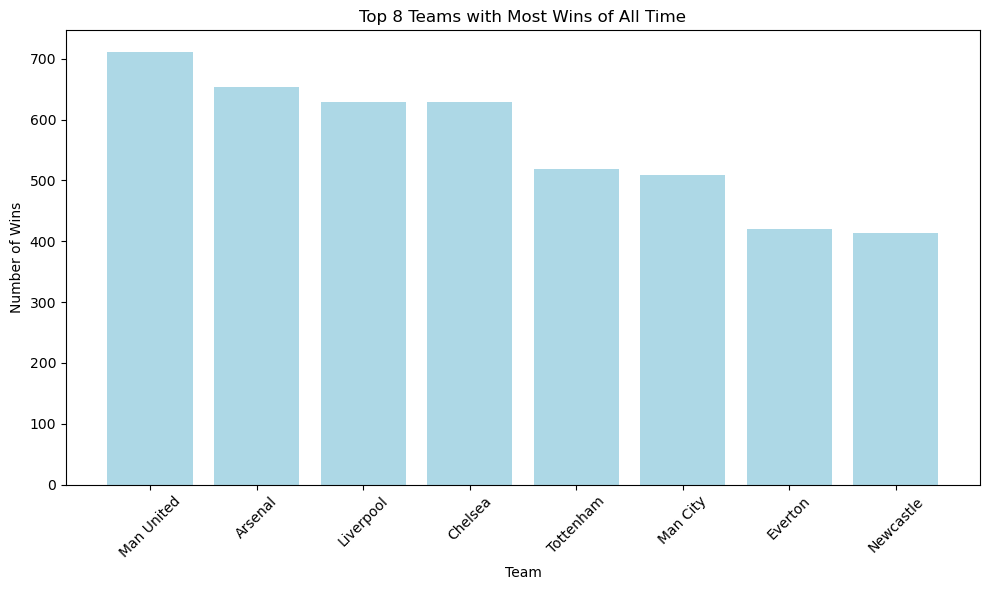

          Team   Wins
28  Man United  711.0
0      Arsenal  654.0
25   Liverpool  629.0
14     Chelsea  628.0
44   Tottenham  519.0
27    Man City  509.0
18     Everton  420.0
30   Newcastle  413.0


In [93]:
# Calculating Wins
# Filtering for Home Wins and Away Wins
home_wins = df[df['FullTimeResult'] == 'H'].groupby('HomeTeam').size()
away_wins = df[df['FullTimeResult'] == 'A'].groupby('AwayTeam').size()

# Combiningw Home Wins and Aay Wins into a single DataFrame
total_wins = home_wins.add(away_wins, fill_value=0).reset_index()
total_wins.columns = ['Team', 'Wins']

# Sorting by Wins in descending order and get the top 8 teams
top_teams = total_wins.sort_values(by='Wins', ascending=False).head(8)

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(top_teams['Team'], top_teams['Wins'], color='lightblue')  # Apply different colors
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.title('Top 8 Teams with Most Wins of All Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the top teams and their wins
print(top_teams)

We can see that the Big 8 includes teams such as
* Manchester United
* Arsenal
* Liverpool
* Chealsea
* Tottenham
* Manchester City
* Everton
* Newcastle
Now we will be seein patterns of how they win, when they win to determine whether or not home matches affect the number of wins that they get.We will be comparing each of the eight teams with 4 teams in each graph.

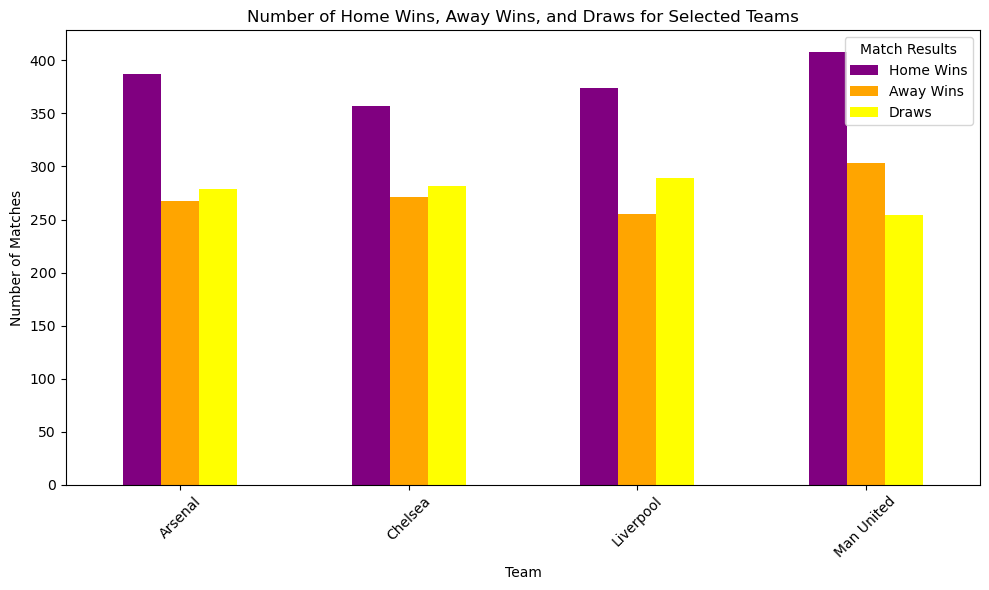

HomeTeam
Arsenal       387
Chelsea       357
Liverpool     374
Man United    408
dtype: int64
AwayTeam
Arsenal       267
Chelsea       271
Liverpool     255
Man United    303
dtype: int64
HomeTeam
Arsenal       279
Chelsea       282
Liverpool     289
Man United    254
dtype: int64


In [96]:
teams = ['Man United', 'Arsenal', 'Liverpool', 'Chelsea']

# Calculating Home Wins, Away Wins, and Draws for each team
home_wins = df[(df['FullTimeResult'] == 'H') & (df['HomeTeam'].isin(teams))].groupby('HomeTeam').size()
away_wins = df[(df['FullTimeResult'] == 'A') & (df['AwayTeam'].isin(teams))].groupby('AwayTeam').size()
draws_home = df[(df['FullTimeResult'] == 'D') & (df['HomeTeam'].isin(teams))].groupby('HomeTeam').size()
draws_away = df[(df['FullTimeResult'] == 'D') & (df['AwayTeam'].isin(teams))].groupby('AwayTeam').size()

# Combining Home and Away Draws
draws = draws_home.add(draws_away, fill_value=0)

# Creating a DataFrame for plotting
results_df = pd.DataFrame({
    'Home Wins': home_wins,
    'Away Wins': away_wins,
    'Draws': draws
}).fillna(0)

# Plotting the data
ax = results_df.plot(kind='bar', figsize=(10, 6), color=['purple', 'orange', 'yellow'])
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.title('Number of Home Wins, Away Wins, and Draws for Selected Teams')
plt.xticks(rotation=45)
plt.legend(title='Match Results')
plt.tight_layout()
plt.show()

print(home_wins)
print(away_wins)
print(draws)

A pattern we see here is that all the teams in the top 4 have won more matches at home than the matches played away. Apart from Manchester United all the teams have more draws than away wins. We will see the pattern for the next 4 teams to see if the pattern persists in them as well. 

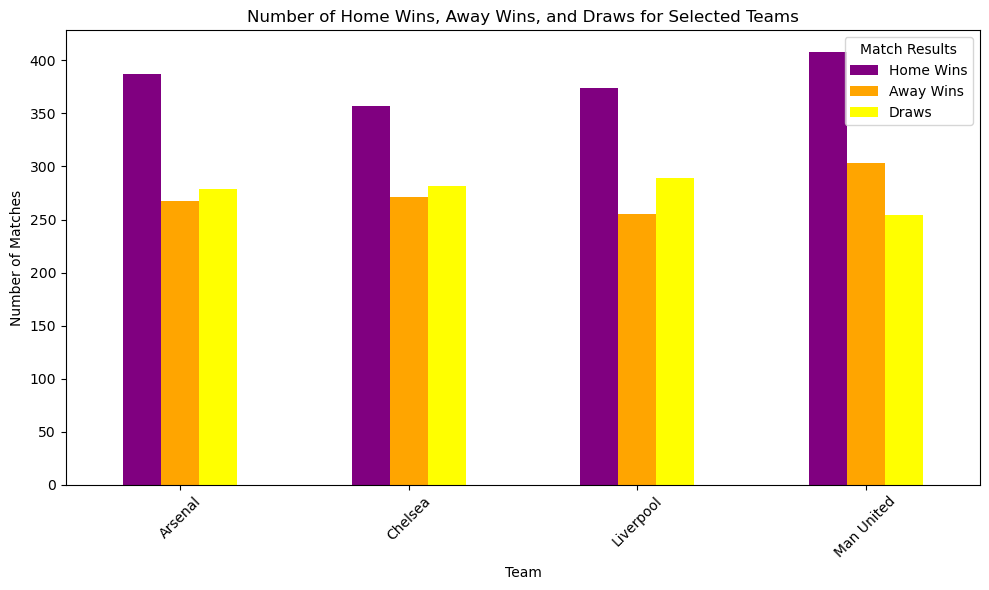

HomeTeam
Arsenal       387
Chelsea       357
Liverpool     374
Man United    408
dtype: int64
AwayTeam
Arsenal       267
Chelsea       271
Liverpool     255
Man United    303
dtype: int64
HomeTeam
Arsenal       279
Chelsea       282
Liverpool     289
Man United    254
dtype: int64


In [99]:
# The teams to consider this time
teams = ['Tottenham', 'Man City', 'Everton', 'Newcastle']

# Creating a DataFrame for plotting
results_df = pd.DataFrame({
    'Home Wins': home_wins,
    'Away Wins': away_wins,
    'Draws': draws
}).fillna(0)

# Plotting the data
ax = results_df.plot(kind='bar', figsize=(10, 6), color=['purple', 'orange', 'yellow'])
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.title('Number of Home Wins, Away Wins, and Draws for Selected Teams')
plt.xticks(rotation=45)
plt.legend(title='Match Results')
plt.tight_layout()
plt.show()

print(home_wins)
print(away_wins)
print(draws)

Although we have very different patterns here. The most glaring one is that Everton has Drawn more Games than Winning on Home or Away. Manchester City on the other hand has more home wins and the number of away and draws are the same. NewCastle has more Draws than Home Wins and Tottenham has more home wins than draws.

# Now we see the number of games played and see the win percentage of the teams.
After that we will figure out through a linear regression which team has a higher winnning percentage in comparision to the matches they have played. To see which team is the best at winning. I will also put in an average line which shows us what is the average winning percentage of the biggest clubs to see which clubs win more and which clubs tend to loose more. 


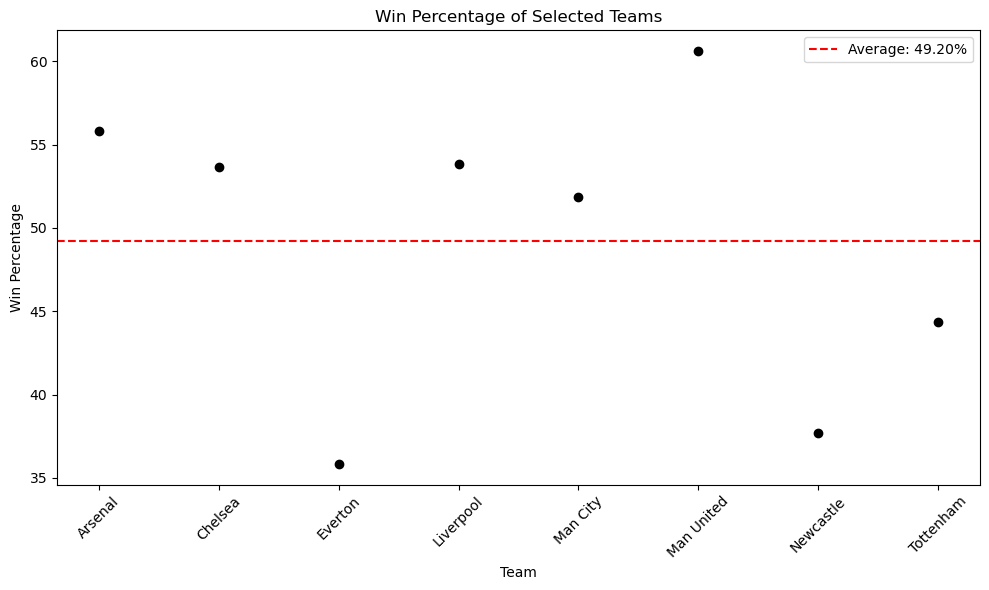

         Team  Win Percentage
0     Arsenal       55.802048
1     Chelsea       53.675214
2     Everton       35.836177
3   Liverpool       53.806672
4    Man City       51.832994
5  Man United       60.613811
6   Newcastle       37.682482
7   Tottenham       44.358974


In [103]:
# Teams
teams = ['Man United', 'Arsenal', 'Liverpool', 'Chelsea', 'Tottenham', 'Man City', 'Everton', 'Newcastle']

# Calculating the total number of games played by each team
home_games = df[df['HomeTeam'].isin(teams)].groupby('HomeTeam').size()
away_games = df[df['AwayTeam'].isin(teams)].groupby('AwayTeam').size()
total_games = home_games.add(away_games, fill_value=0)

# Calculating the total number of wins for each team
home_wins = df[(df['FullTimeResult'] == 'H') & (df['HomeTeam'].isin(teams))].groupby('HomeTeam').size()
away_wins = df[(df['FullTimeResult'] == 'A') & (df['AwayTeam'].isin(teams))].groupby('AwayTeam').size()
total_wins = home_wins.add(away_wins, fill_value=0)

# Calculating the win percentage
win_percentage = (total_wins / total_games) * 100

# Creating a DataFrame for plotting
win_percentage_df = pd.DataFrame({
    'Team': win_percentage.index,
    'Win Percentage': win_percentage.values
})

# Calculating the average win percentage
average_win_percentage = win_percentage.mean()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(win_percentage_df['Team'], win_percentage_df['Win Percentage'], color='black')
plt.axhline(y=average_win_percentage, color='red', linestyle='--', label=f'Average: {average_win_percentage:.2f}%')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Selected Teams')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Print the win percentage data
print(win_percentage_df)

# We see that the average winning percentage in 49.20.
We see that there are only 3 teams with a winning percentage less than the average which are
* Everton
* Newcastle
* Tottenham

We see that the rest teams are above the average with the highest among them being Manchester United and the Lowest among all 8 teams are Everton.

## Calculating Winning Percentage for all the teams
Now we will be calculating the win percentage of all the teams in the league from the beginnning using a scatterplot which showcases us the percentage of wins each team has. The ratio of games won to the total number of games each team has played is shown by each team's win percentage. It is a crucial indicator that shows how successful and productive the teams are throughout the course of the season or over a given duration. One may assess the teams' consistency and level of competition by looking at their victory percentages. Greater percentages signify a team's supremacy and steady performance, whilst lower percentages could point to the team's shortcomings or difficulties. This figure is essential for drawing comparisons, making strategic decisions in sports administration, and keeping supporters updated on the performance of their preferred teams.

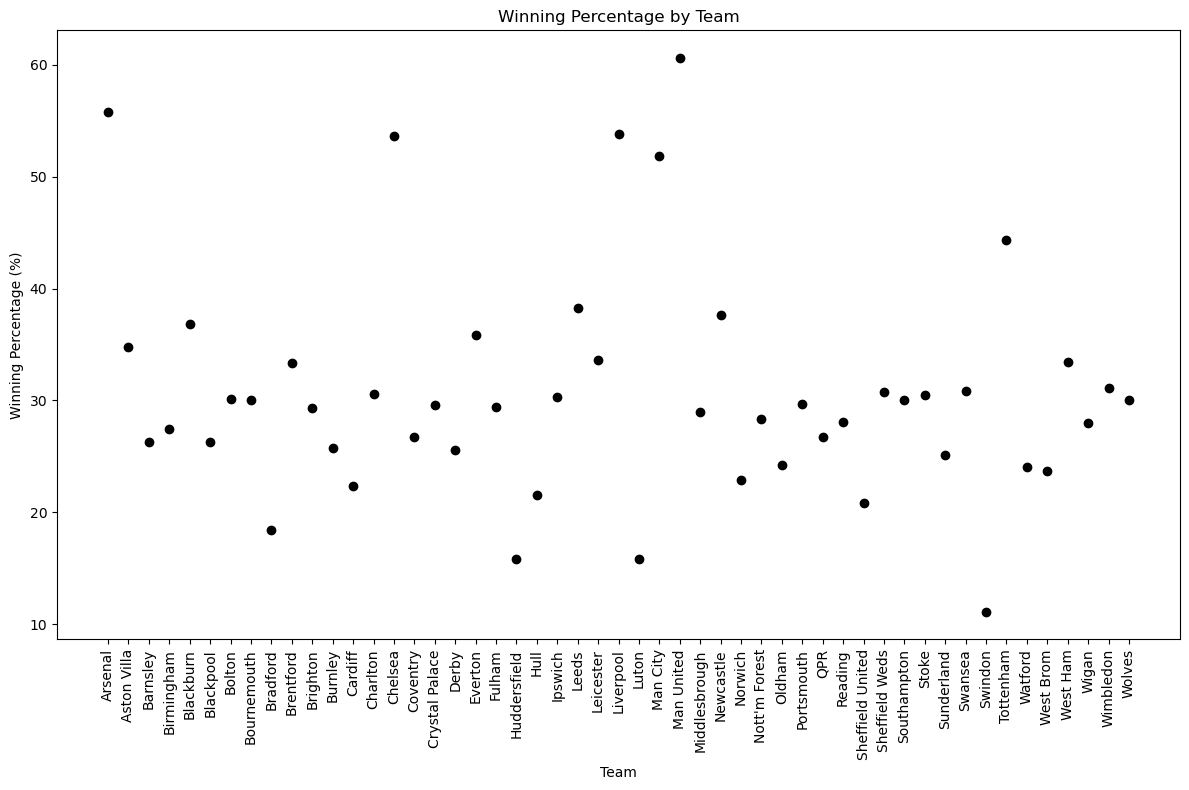

                Team  WinningPercentage
0            Arsenal          55.802048
1        Aston Villa          34.815516
2           Barnsley          26.315789
3         Birmingham          27.443609
4          Blackburn          36.875000
5          Blackpool          26.315789
6             Bolton          30.161943
7        Bournemouth          30.075188
8           Bradford          18.421053
9          Brentford          33.333333
10          Brighton          29.323308
11           Burnley          25.730994
12           Cardiff          22.368421
13          Charlton          30.592105
14           Chelsea          53.675214
15          Coventry          26.755853
16    Crystal Palace          29.601518
17             Derby          25.563910
18           Everton          35.836177
19            Fulham          29.411765
20      Huddersfield          15.789474
21              Hull          21.578947
22           Ipswich          30.344828
23             Leeds          38.285714


In [106]:
# Calculating Game Wins
home_games = df.groupby('HomeTeam').size()
away_games = df.groupby('AwayTeam').size()
total_games = home_games.add(away_games, fill_value=0)

home_wins = df[df['FullTimeResult'] == 'H'].groupby('HomeTeam').size()
away_wins = df[df['FullTimeResult'] == 'A'].groupby('AwayTeam').size()
total_wins = home_wins.add(away_wins, fill_value=0)

# Calculating winning percentage
winning_percentage = (total_wins / total_games) * 100
winning_percentage = winning_percentage.reset_index()
winning_percentage.columns = ['Team', 'WinningPercentage']

# Plotting the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(winning_percentage['Team'], winning_percentage['WinningPercentage'], color='black')

plt.xlabel('Team')
plt.ylabel('Winning Percentage (%)')
plt.title('Winning Percentage by Team')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(winning_percentage)

We see that most of the teams are between the 20% to the 40% range. 

# Conclusion
To sum up, the win percentage is an essential sports analytics metric that provides a precise indication of a team's performance in games. It gives a numerical foundation for evaluating a team's efficacy and performance. Greater win percentages are a sign of a team's resilience and ability to play consistently under pressure, which are necessary for winning titles. On the other hand, in order to improve their chances going forward, clubs with lower win percentages may need to review their player performances and strategy. Gaining an understanding of these indicators is essential for assessing team development, directing training choices, and enhancing team dynamics in general.